#**Marketing Analytics**#


#**Statistical Testing**#
**PRABU JEYABALAN**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
import matplotlib.image as mpimg

**A.Examine your variables. Which ones are numeric, and which ones are
categorical?**


In [ ]:
df = pd.read_csv('/content/merch_23 (1).csv')
df.head()

,purchaseID,day_code,merch_total,returns,return_total
0,1,R,17.23,0,0.00
1,2,W,34.83,0,0.00
2,3,R,25.02,1,6.26
3,4,R,39.15,0,0.00
4,5,H,18.38,0,0.00


In [ ]:
df_info = df.info()

# Identify numeric and categorical columns based on data type.
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric variables:", numeric_cols)
print("Categorical variables:", categorical_cols)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2850 entries, 0 to 2849
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   purchaseID    2850 non-null   int64  
 1   day_code      2850 non-null   object 
 2   merch_total   2850 non-null   float64
 3   returns       2850 non-null   int64  
 4   return_total  2850 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 111.5+ KB
Numeric variables: ['purchaseID', 'merch_total', 'returns', 'return_total']
Categorical variables: ['day_code']


*Even though 'purchaseID' and 'returns' were initially interpreted as numerical by Python, it's clear from the dataset that they are actually categorical in nature. 'purchaseID' is a unique transaction identifier, and 'returns' is a binary variable indicating whether or not a return was made. To ensure these variables do not affect the accuracy of my statistical tests, I have converted them to categorical. This step ensures that they are treated appropriately in the analysis and that their nature as identifiers and binary outcomes is preserved, avoiding any potential skew in the results.*

In [ ]:
# i) Converting Purchase ID as categorical variable
df['purchaseID'] = df['purchaseID'].astype('category')

# ii) Converting Returns variable as categorical variable
df['returns'] = df['returns'].astype('category')

# iii) Converting day_code as categorical variable
df['day_code'] = df['day_code'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2850 entries, 0 to 2849
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   purchaseID    2850 non-null   category
 1   day_code      2850 non-null   category
 2   merch_total   2850 non-null   float64 
 3   returns       2850 non-null   category
 4   return_total  2850 non-null   float64 
dtypes: category(3), float64(2)
memory usage: 142.8 KB


**B. What was the last item that you purchased online, and then returned? Why did
you return it? (If you have never returned an item that you purchased online, just
say that here – but you should still answer the next two questions). How is the
returns process a hassle for consumers? How can returns be problematic for
online businesses?**

*A couple of years ago, I purchased an air conditioner through Flipkart in India after carefully reviewing the specifications. The AC was delivered within a few days but since I was not at home they left it at my front door. The next day when I checked the product I noticed that the manufacturing year was different from what was listed on the website.*

*I contacted customer service and they informed me that the seller would reach out directly. After waiting two more days, I received an email from the seller claiming they had delivered the correct product. I responded with screenshots comparing the websites specifications to the actual product I received. After reviewing the evidence, the seller admitted their mistake and agreed to a return.*

*However, the return process turned out to be another problem. They scheduled the return for a week later, as their technician needed to inspect the product first as the product was opened. Additionally, the return logistics didn't operate as efficiently as the forward supply chain, as they tried to optimize the return process to minimize costs. Eventually, they collected the product and refunded my money, but the entire experience left me feeling frustrated.*

*I had to endure nearly 20 days without an AC during a hot summer in India, with temperatures reaching 38 degrees Celsius. This whole ordeal was quite stressful and disappointing.*

**C. Generate a barplot to show the average merch_total values, separated by the
different day_code types.**


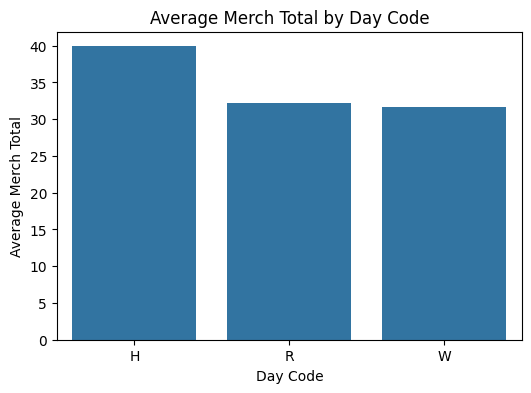

In [ ]:
average_merch_by_day = df.groupby('day_code')['merch_total'].mean()

# barplot
plt.figure(figsize=(6, 4))
sns.barplot(x=average_merch_by_day.index, y=average_merch_by_day.values)
plt.xlabel('Day Code')
plt.ylabel('Average Merch Total')
plt.title('Average Merch Total by Day Code')
plt.show()

**a. Describe your barplot in a few sentences. Why do you think it might
look the way that it does?**

*The bar plot shows that people tend to spend the most on holidays, with an average purchase total around 40 dollars, while regular days and weekends see lower spending, averaging about $30. This is because holiday promotions or sales events encourage customers to spend more, either by buying bigger or more expensive items. During holidays people often plan ahead for celebrations which might be the reason for higher totals.*

*Another reason could be that holidays bring more group or family shopping, where people make larger purchases together unlike regular days or weekends when shopping is more routine. Holiday-specific products or special bundles might also tempt people to spend more than they would on a typical day.*

*It's possible that shoppers often buy gifts or prepare for specific events or gifts, which keeps the total amount spent higher during holidays. In contrast, on regular days and weekends people might be buying everyday items like groceries which naturally leads to lower purchase totals.*

*Holidays often mean travel or celebrations so shoppers may be stocking up on more than just gifts they might be buying food, decorations or supplies for gatherings pushing their spending even higher. By understanding these patterns Lobster Land can focus on maximizing holiday sales and look for ways to boost regular and weekend spending, perhaps with promotions or incentives.*

**D.Its time for some feature engineering!**

**a.Create a new variable in this dataset called return_proportion. Return
proportion should be found by taking the return_total value, and dividing
by the merch_total value. If customers did not return any items, they ll
just have a zero in this column.**


In [ ]:
df['return_proportion']=df['return_total']/df['merch_total']
df['return_proportion'].fillna(0,inplace=True)
df.head()

,purchaseID,day_code,merch_total,returns,return_total,return_proportion
0,1,R,17.23,0,0.00,0.0000
1,2,W,34.83,0,0.00,0.0000
2,3,R,25.02,1,6.26,0.2502
3,4,R,39.15,0,0.00,0.0000
4,5,H,18.38,0,0.00,0.0000


**E. Next, let’s run some statistical tests. We will use two-sample t-tests here to
make comparisons among each of the day_code groups. Since we have three
groups, we’ll need to run three tests (R vs. H, R vs. W, and H vs. W). Your
response variable in these tests will be return_proportion.**

**a. What null hypothesis will you use for your tests?**

*For the two-sample t-tests between each pair of day_code groups (R vs. H, R vs. W, and H vs. W), my null hypothesis will be that there is no difference in the return proportion between the two groups being compared.*

*R vs. H: The return proportion on regular days (R) is equal to the return proportion on holidays (H).*

*R vs. W: The return proportion on regular days (R) is equal to the return proportion on weekends (W).*

*H vs. W: The return proportion on holidays (H) is equal to the return proportion on weekends (W).*


**b. What alpha threshold do you wish to use for this test?**

*I wish to choose standard alpha threshold of 0.05, which means there is a 5% risk of committing a Type I error (rejecting the null hypothesis when it is actually true).*

**c. What is a Bonferroni correction? Explain its purpose**

*The Bonferroni correction is a method used to adjust the significance threshold (alpha level) when performing multiple statistical tests. Its purpose is to reduce the risk of Type I errors, which occur when we falsely reject the null hypothesis due to the increased chance of finding significant results by chance when conducting multiple tests. The Bonferroni correction achieves this by dividing the alpha level by the number of tests being performed, effectively lowering the threshold for significance in each individual test.*

**d.With a Bonferroni correction in mind, what is the new alpha threshold
that you will use for the three tests?**

*he formula for the corrected alpha is alpha(corrected) = alpha/number of tests.*

*In this case alpha(corrected) = 0.05/3 , since we are performing 3 tests.*

*Therefore, alpha (corrected) = 0.0167*

**e.Execute the three tests in Python**

In [ ]:
# Test 1: R vs. H
regular_return_proportion = df[df['day_code'] == 'R']['return_proportion']
holiday_return_proportion = df[df['day_code'] == 'H']['return_proportion']
t_statistic, p_value = stats.ttest_ind(regular_return_proportion, holiday_return_proportion)
print("R vs. H:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)


# Test 2: R vs. W
regular_return_proportion = df[df['day_code'] == 'R']['return_proportion']
weekend_return_proportion = df[df['day_code'] == 'W']['return_proportion']
t_statistic, p_value = stats.ttest_ind(regular_return_proportion, weekend_return_proportion)
print("\nR vs. W:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)


# Test 3: H vs. W
holiday_return_proportion = df[df['day_code'] == 'H']['return_proportion']
weekend_return_proportion = df[df['day_code'] == 'W']['return_proportion']
t_statistic, p_value = stats.ttest_ind(holiday_return_proportion, weekend_return_proportion)
print("\nH vs. W:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

R vs. H:
t-statistic: -2.6368275778750876
p-value: 0.008437632002881588

R vs. W:
t-statistic: -0.5350242797628775
p-value: 0.5926850371557939

H vs. W:
t-statistic: 2.0239658771157774
p-value: 0.043147154842248056


**f. What results did you obtain here? What do these results mean? Based
on these results, write 3-4 sentences about what this could mean for
Lobster Land – how should they use/interpret these results?**

**R vs H:**

*Since the p-value (0.0084) is less than the Bonferroni-corrected alpha (0.0167), we reject the null hypothesis. This means there is a statistically significant difference in return proportions between regular days and holidays.*

**R vs W**

*The p-value (0.593) is greater than the corrected alpha (0.0167), so we fail to reject the null hypothesis. This suggests there is no significant difference in return proportions between regular days and weekends.*

**H vs W**

*The p-value (0.0431) is greater than the corrected alpha (0.0167), so we fail to reject the null hypothesis. This means there is no significant difference in return proportions between holidays and weekends.*

**Interpretation**

*Holiday periods show a noticeable increase in return proportions compared to regular shopping days, partly because more sales happen during the holidays which naturally leads to a higher volume of returns. To address this, Lobster Land should focus on managing returns more effectively during these periods by refining return policies and adjusting holiday promotions to reduce the likelihood of returns.*

*Since weekends and regular days have similar return rates Lobster Land doesn't need to treat them differently.*

*Holidays and weeekends show no significant difference in return propotion since weekend return proportion lies inbetween Regular day and holiday.*



**F. Filter the data. Create a subset of the original dataset, so that only the rows for
which *something* was returned are included (in other words, discard the rows
for which there was no return at all). Using the same alpha threshold as you
used in the previous step (with the Bonferroni correction), run another set of
three tests using this filtered data**

In [ ]:
df_filtered = df[df['return_total'] > 0]

# Test 1: R vs. H (filtered data)
regular_return_proportion = df_filtered[df_filtered['day_code'] == 'R']['return_proportion']
holiday_return_proportion = df_filtered[df_filtered['day_code'] == 'H']['return_proportion']
t_statistic, p_value = stats.ttest_ind(regular_return_proportion, holiday_return_proportion)
print("R vs. H (filtered):")
print("t-statistic:", t_statistic)
print("p-value:", p_value)


# Test 2: R vs. W (filtered data)
regular_return_proportion = df_filtered[df_filtered['day_code'] == 'R']['return_proportion']
weekend_return_proportion = df_filtered[df_filtered['day_code'] == 'W']['return_proportion']
t_statistic, p_value = stats.ttest_ind(regular_return_proportion, weekend_return_proportion)
print("\nR vs. W (filtered):")
print("t-statistic:", t_statistic)
print("p-value:", p_value)


# Test 3: H vs. W (filtered data)
holiday_return_proportion = df_filtered[df_filtered['day_code'] == 'H']['return_proportion']
weekend_return_proportion = df_filtered[df_filtered['day_code'] == 'W']['return_proportion']
t_statistic, p_value = stats.ttest_ind(holiday_return_proportion, weekend_return_proportion)
print("\nH vs. W (filtered):")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

R vs. H (filtered):
t-statistic: -4.758996544971903
p-value: 2.3723470662049705e-06

R vs. W (filtered):
t-statistic: -0.747149924235664
p-value: 0.4551816539874729

H vs. W (filtered):
t-statistic: 3.7379117895743517
p-value: 0.00020433593078581953


**a.What were the t-statistics and p-statistics for each head-to-head test?
What conclusions can be drawn from them?**

*R vs. H The t-statistic of -4.76 indicates a large negative difference between returns on regular days and holidays.The p-value (2.37e-06) is much smaller than the alpha level (0.0167), which suggests strong evidence to reject the null hypothesis.*

*Conclusion:*
*There is a significant difference in return rates between regular days and holidays, with holidays having a higher return rate compared to regular days.*

*R vs. W The t-statistic of -0.75 is quite small, indicating no substantial difference between regular days and weekends.The p-value of 0.455 is greater than the alpha level (0.0167), meaning there is insufficient evidence to reject the null hypothesis.*

*Conclusion:*
*There is no significant difference in return rates between regular days and weekends.*

*H vs. W The t-statistic of 3.74 indicates a strong positive difference between returns on holidays and weekends, with holidays showing higher returns.The p-value (0.000204) is much smaller than the alpha level (0.0167), providing strong evidence to reject the null hypothesis.*

*Conclusion:*
*There is a significant difference in return rates between holidays and weekends, with holidays having higher return rates than weekends.*






**b. In a few sentences, based on these results, what can you suggest for
Lobster Land?**

*The filtered data, which focuses on cases where returns occurred, suggests that holidays are particularly prone to higher return rates compared to both regular days and weekends. Lobster Land should prioritize creating targeted strategies to reduce returns during holidays, including improving customer service, offering holiday-specific return policies, and possibly managing inventory differently. Regular days and weekends can be treated similarly, as they show no significant difference in return rates.*

*Additionally, Lobster Land should ensure that product images and descriptions on its website and in advertisements clearly communicate key details like dimensions, colors, and features. Providing accurate descriptions and transparent shipping timelines can help set proper customer expectations, ultimately reducing returns and improving satisfaction.*

**B. Using the actual numbers of people from each of the three groups who made
returns, run a chi-square goodness of fit test to assess your null hypothesis. Show
your results.**


In [ ]:
observed_returns = df_filtered.groupby('day_code')['return_total'].count().values

# Expected proportions (equal proportions for three groups)
expected_proportions = [1/3, 1/3, 1/3]

# Total number of returns
total_returns = sum(observed_returns)


# Expected values based on the expected proportions
expected_returns = [total_returns * prop for prop in expected_proportions]

# Chi-Square goodness of fit test
chi2_stat, p_value = stats.chisquare(observed_returns, f_exp=expected_returns)

# results

print("Observed returns:", observed_returns)
print("Expected returns:", expected_returns)
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)

# Interpretation
alpha = 0.0167
if p_value < alpha:
    print("Reject the null hypothesis. The proportions of returns differ significantly across the day_code groups.")
else:
    print("Fail to reject the null hypothesis. No significant difference in return proportions across day_code groups.")

Observed returns: [208 482 362]
Expected returns: [350.66666666666663, 350.66666666666663, 350.66666666666663]
Chi-square statistic: 107.59695817490496
p-value: 4.321329650666232e-24
Reject the null hypothesis. The proportions of returns differ significantly across the day_code groups.


**a. What is the p-value of this test? Based on this value, what will you
conclude? Be sure to mention the null hypothesis in your answer to this
question.**

*The null hypothesis for the chi-square goodness of fit test is that observed return proportions for Holidays (H), Regular Days (R), and Weekends (W) are equal to the expected return proportions, assuming that there is no difference among these groups.*

*Since p-value is extremly low, which is far below any conventional alpha threshold 0.05 or our alpha (corrected) 0.0167, we reject the null hypothesis.*

*This means that there is a significant difference in return proportions among the three groups, suggesting that the pattern of returns differs significantly across Holidays, Regular Days, and Weekends.*

**C. Demonstrate where the chi-square number from your test came from. Use
Jupyter Notebook or Colab to do this, but do not use any Python libraries or
modules. Instead, show the calculation used to determine the chi-square value
using numeric values (in the same manner as the hat example from class, for
which the script is posted to Blackboard).**

In [ ]:
 chi_sq_using_numeric_values = (208-351)**2 / 351 + (482-351)**2 / 351 + (362-351)**2 / 351
 print("chi-square value using numeric values:",chi_sq_using_numeric_values)

chi-square value using numeric values: 107.49572649572649
